### Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import xarray as xr
import hsmm_mvpy as hmp
import matplotlib.pyplot as plt
from pathlib import Path
from mne import channels
from mne.io import read_info
from shared.utilities import SAT1_STAGES_ACCURACY, SAT1_STAGES_SPEED, SAT2_STAGES_ACCURACY, SAT2_STAGES_SPEED, AR_STAGES
from shared.data import add_stages_to_dataset, label_model

2023-07-15 13:48:28.314798: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-15 13:48:28.803627: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Short version using add_stages_to_dataset

Transforming epoched data to principal component (PC) space


/mnt/c/git/hsmm_mvpy/src/hsmm_mvpy/utils.py:533: UserWarning: Requested standardization of between participant variance yet no participant dimension is found in the data or only one participant is present. No standardization is done, set apply_standard to False to avoid this warning.
  warn('Requested standardization of between participant variance yet no participant dimension is found in the data or only one participant is present. No standardization is done, set apply_standard to False to avoid this warning.')


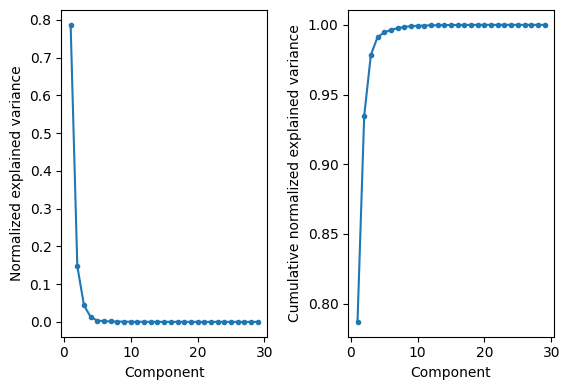

Fitting HMP model for AC condition
Estimating 4 events model with 100 starting point(s)
Parameters estimated for 4 events model
Labeling dataset for AC condition
Processing participant 0001
0 0 slice(3, 28, None) 198
0 0 slice(28, 36, None) 198
0 0 slice(36, 42, None) 198
0 0 slice(42, 197, None) 198
0 1 slice(2, 24, None) 68
0 1 slice(24, 36, None) 68
0 1 slice(36, 45, None) 68
0 1 slice(45, 67, None) 68
0 2 slice(4, 26, None) 107
0 2 slice(26, 29, None) 107
0 2 slice(29, 53, None) 107
0 2 slice(53, 106, None) 107
0 3 slice(5, 22, None) 99
0 3 slice(22, 34, None) 99
0 3 slice(34, 82, None) 99
0 3 slice(82, 98, None) 99
0 4 slice(4, 21, None) 135
0 4 slice(21, 30, None) 135
0 4 slice(30, 42, None) 135
0 4 slice(42, 134, None) 135
0 5 slice(3, 21, None) 72
0 5 slice(21, 21, None) 72
0 5 slice(21, 56, None) 72
0 5 slice(56, 71, None) 72
0 6 slice(5, 25, None) 72
0 6 slice(25, 32, None) 72
0 6 slice(32, 43, None) 72
0 6 slice(43, 71, None) 72
0 7 slice(3, 23, None) 121
0 7 slice(23, 34, N

In [20]:
# Amount of cores to use in multiprocessing
cpus = 12

epoched_data_path = Path("data/sat1/data.nc")
output_path = Path("data/sat1/stage_data.nc")
conditions = ["AC", "SP"]
# labels = {"AC": SAT1_STAGES_ACCURACY[:-1], "SP": SAT1_STAGES_SPEED[:-1]}
labels = {"AC": SAT1_STAGES_ACCURACY, "SP": SAT1_STAGES_SPEED}

stage_data = add_stages_to_dataset(
    epoched_data_path,
    labels,
    conditions=conditions,
    cpus=cpus,
    fit_function="fit_single",  # n_events is extracted from the amount of labels in 'conditions' variable
    fit_args={"starting_points": 100},
)
# Use fit(), letting the model decide on an amount of events
# stage_data = add_stages_to_dataset(
#     epoched_data_path, output_path, labels, conditions=conditions, cpus=cpus
# )

# stage_data.to_netcdf(output_path)

In [7]:
# Sets all data to NaN where condition is false
# Only labels coordinate? Or data as well
encoding_data_sat1 = stage_data.where(stage_data.labels == "encoding", drop=True)

In [20]:
# encoding_data_sat1.sel(participant='0021', epochs=1).labels
np.unique(stage_data.labels, equal_nan=True)

TypeError: '<' not supported between instances of 'str' and 'float'

### Manual version

In [29]:
# Amount of cores to use in multiprocessing
cpus = 12

# Load complete SAT1 dataset
eeg_data = xr.load_dataset("data/sat1/data.nc")

# Load x and y positions of electrodes
positions_path = Path("data/sat1/preprocessed/processed_0001_epo.fif")
positions = read_info(Path("data/sat1/preprocessed/processed_0001_epo.fif"))

output_path = Path("data/sat1/stage_data.nc")

In [41]:
eeg_data.sel(participant=["0001"], epochs=1)

<xarray.Dataset>
Dimensions:      (channels: 30, samples: 199, participant: 1)
Coordinates:
    epochs       int64 1
  * channels     (channels) object 'Fp1' 'Fp2' 'AFz' 'F7' ... 'CPz' 'CP2' 'CP6'
  * samples      (samples) int64 0 1 2 3 4 5 6 7 ... 192 193 194 195 196 197 198
    stim         (participant) float64 1.0
    resp         (participant) object 'resp_left'
    rt           (participant) float64 0.683
    cue          (participant) object 'SP'
    movement     (participant) object 'stim_left'
    trigger      (participant) object 'SP/stim_left/resp_left'
  * participant  (participant) object '0001'
Data variables:
    data         (participant, channels, samples) float64 -1.789 -0.5152 ... nan
Attributes:
    sfreq:    100.0
    offset:   0

In [28]:
eeg_data

<xarray.DataArray 'data' (participant: 1, samples: 199)>
array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan]])
Coordinates:
    epochs       int64 0
    channels     <U3 'Fp1'
  * samples      (samples) int64 0 1 2 3 4 5 6 7 ... 192 193 194 195 196 197 198
    stim         (participant) float64 nan
    resp         (participant) object ''
    rt           (participant) float64 nan
    cue          (participant) object ''
    movement     (participant) object ''
    trigger      (participant) object ''
  * participant  (participant) object '0001'

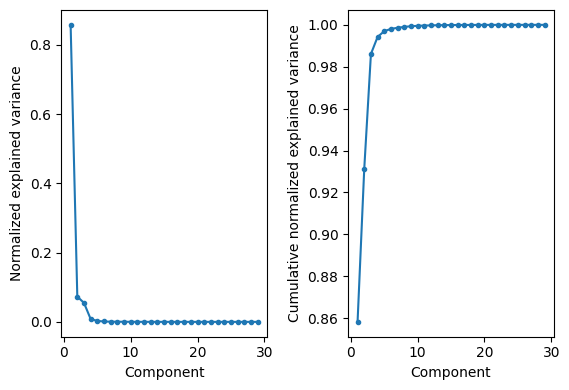

In [4]:
# Transform data into principal component (PC) space
# will ask in a pop-up how many components to keep
# selection depends on data size, choose number at cutoff (90/99%) or at 'elbow' point
hmp_data = hmp.utils.transform_data(eeg_data)

### Initialize models

In [30]:
hmp_accuracy_data = hmp.utils.condition_selection(
    hmp_data, eeg_data, "AC", variable="cue"
)
model_accuracy = hmp.models.hmp(
    hmp_accuracy_data, cpus=cpus, sfreq=eeg_data.sfreq, estimate_magnitudes=True
)


hmp_speed_data = hmp.utils.condition_selection(hmp_data, eeg_data, "SP", variable="cue")
model_speed = hmp.models.hmp(
    hmp_speed_data, cpus=cpus, sfreq=eeg_data.sfreq, estimate_magnitudes=True
)

#### Regular fitting

In [29]:
# Let model find stage transitions
fit_accuracy = model_accuracy.fit(grid_points=10, fix_iter=False)

  0%|          | 0/89 [00:00<?, ?it/s]

Transition event 1 found around sample 8
Transition event 2 found around sample 26
Transition event 3 found around sample 52
Transition event 4 found around sample 59
Transition event 5 found around sample 62
Transition event 6 found around sample 83
Estimating 6 events model
Parameters estimated for 6 events model


In [25]:
fit_speed = model_speed.fit(grid_points=25, fix_iter=False)

  0%|          | 0/51 [00:00<?, ?it/s]

Transition event 1 found around sample 8
Transition event 2 found around sample 25
Transition event 3 found around sample 45
Estimating 3 events model
Parameters estimated for 3 events model


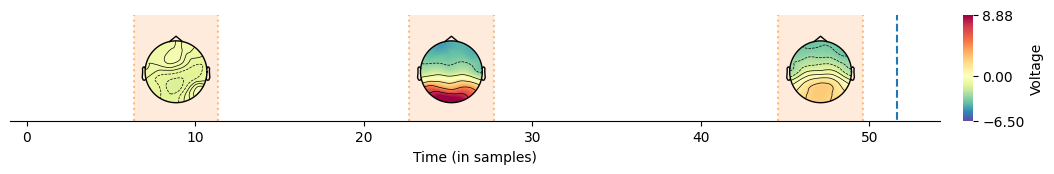

In [27]:
hmp.visu.plot_topo_timecourse(
    eeg_data,
    fit_speed,
    positions,
    model_speed,
    vmin=-6.5,
    times_to_display=np.mean(model_speed.ends - model_speed.starts),
)

In [31]:
# Tell model amount of events
fit_accuracy = model_accuracy.fit_single(4, starting_points=100)
fit_speed = model_speed.fit_single(3, starting_points=100)

Estimating 4 events model with 100 starting point(s)
Parameters estimated for 4 events model
Estimating 3 events model with 100 starting point(s)
Parameters estimated for 3 events model


In [6]:
acc_labels = label_model(fit_accuracy, eeg_data, SAT1_STAGES_ACCURACY)
sp_labels = label_model(fit_speed, eeg_data, SAT1_STAGES_SPEED)

Processing participant 0001
Processing participant 0002
Processing participant 0003
Processing participant 0004
Processing participant 0005
Processing participant 0006
Processing participant 0007
Processing participant 0008
Processing participant 0009
Processing participant 0010
Processing participant 0011
Processing participant 0012
Processing participant 0013
Processing participant 0014
Processing participant 0015
Processing participant 0016
Processing participant 0017
Processing participant 0018
Processing participant 0019
Processing participant 0020
Processing participant 0021
Processing participant 0022
Processing participant 0023
Processing participant 0024
Processing participant 0025
Processing participant 0001
Processing participant 0002
Processing participant 0003
Processing participant 0004
Processing participant 0005
Processing participant 0006
Processing participant 0007
Processing participant 0008
Processing participant 0009
Processing participant 0010
Processing participa

In [7]:
# Merge AC and SP condition labels (an epoch is either AC or SP so these are sets without common members)
merged = np.where(acc_labels == np.nan, sp_labels, acc_labels)
# Add stage info to eeg_data Dataset and save
stage_data = eeg_data.assign_coords(
    labels=(["participant", "epochs", "samples"], merged)
)
stage_data.to_netcdf(output_path)

# Debugging

In [10]:
# Check dataset size in MB
print(eeg_data.nbytes / (1024**2))
print(stage_data.nbytes / (1024**2))

227.9697723388672
235.56101989746094


In [33]:
stage_data.sel(participant="0021", epochs=1, samples=slice(1, 150)).labels

<xarray.DataArray 'labels' (samples: 150)>
array([nan, nan, nan, nan, 'encoding', 'encoding', 'encoding', 'encoding',
       'encoding', 'encoding', 'encoding', 'encoding', 'encoding',
       'encoding', 'encoding', 'encoding', 'encoding', 'encoding',
       'encoding', 'encoding', 'decision', 'decision', 'decision',
       'decision', 'decision', 'decision', 'decision', 'decision',
       'decision', 'decision', 'decision', 'decision', 'decision',
       'decision', 'decision', 'decision', 'decision', 'decision',
       'decision', 'decision', 'decision', 'decision', 'decision',
       'decision', 'decision', 'decision', 'decision', 'decision',
       'decision', 'decision', 'decision', 'decision', 'confirmation',
       'confirmation', 'confirmation', 'confirmation', 'confirmation',
       'confirmation', 'confirmation', 'confirmation', 'confirmation',
       'confirmation', 'confirmation', 'confirmation', 'confirmation',
       'confirmation', 'confirmation', 'confirmation', 'confirmation',
       'confirmation', 'confirmation', 'confirmation', 'confirmation',
       'confirmation', 'confirmation', 'confirmation', 'confirmation',
       'confirmation', 'confirmation', 'confirmation', 'confirmation',
       'confirmation', 'confirmation', 'confirmation', 'confirmation',
       'confirmation', 'confirmation', 'confirmation', 'confirmation',
       'confirmation', 'confirmation', 'confirmation', 'confirmation',
       'confirmation', 'confirmation', 'confirmation', 'confirmation',
       'confirmation', 'confirmation', 'confirmation', 'confirmation',
       'confirmation', 'confirmation', 'confirmation', 'confirmation',
       'confirmation', 'confirmation', 'confirmation', 'confirmation',
       'confirmation', 'confirmation', 'confirmation', 'confirmation',
       'confirmation', 'confirmation', 'confirmation', 'confirmation',
       'confirmation', 'confirmation', 'confirmation', 'confirmation',
       'confirmation', 'response', 'response', 'response', 'response',
       'response', 'response', 'response', 'response', 'response',
       'response', 'response', 'response', 'response', 'response',
       'response', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan], dtype=object)
Coordinates:
    epochs       int64 1
  * samples      (samples) int64 1 2 3 4 5 6 7 8 ... 144 145 146 147 148 149 150
    stim         float64 1.0
    resp         object 'resp_right'
    rt           float64 1.388
    cue          object 'AC'
    movement     object 'stim_left'
    trigger      object 'AC/stim_left/resp_right'
    participant  <U4 '0021'
    labels       (samples) object nan nan nan nan 'encoding' ... nan nan nan nan

In [98]:
int(eeg_data.sel(participant="0021", epochs=1).isnull().argmax("samples").data[0])

139

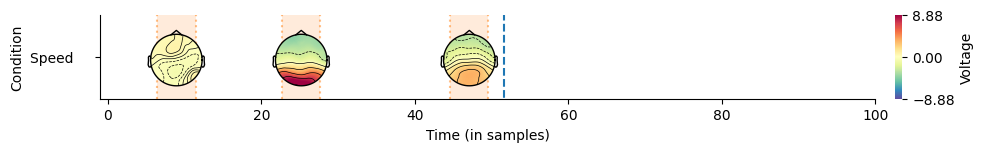

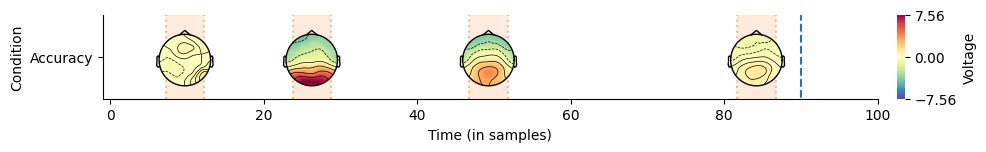

In [32]:
for condition in zip(
    [fit_speed, fit_accuracy],
    [model_speed, model_accuracy],
    [hmp_speed_data, hmp_accuracy_data],
    ["Speed    ", "Accuracy"],
):
    hmp.visu.plot_topo_timecourse(
        eeg_data,
        condition[0],
        positions,
        condition[1],
        times_to_display=np.mean(condition[1].ends - condition[1].starts),
        max_time=100,
        figsize=(10, 1),
        ylabels={"Condition": [condition[3]]},
    )